**Сборный проект - компьютерные игры.**

**Цели исследования:**

Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Описание данных:**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**План работы**

1. Шаг 1. Откройте файл с данными и изучите общую информацию

2. Шаг 2. Подготовьте данные

3. Шаг 3. Проведите исследовательский анализ данных

4. Шаг 4. Составьте портрет пользователя каждого региона

5. Шаг 5. Проверьте гипотезы

6. Шаг 6. Напишите общий вывод


<div class="alert alert-success">

**Артём:** 👍 Отлично, что есть описание проекта и столбцов датасета.
</div>

#### Откроем файл с данными и изучим общую информацию ####

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
# чтение файла с данными и сохранение в прерменной df
df = pd.read_csv('/datasets/games.csv')

In [3]:
# выведем первые 20 строк на экран
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-success">

**Артём:** 👍 Правильно, что разделяешь загрузку библиотек, датасета и рабочий код.
    
</div>

In [4]:
#получение общей информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#список характерных значений
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


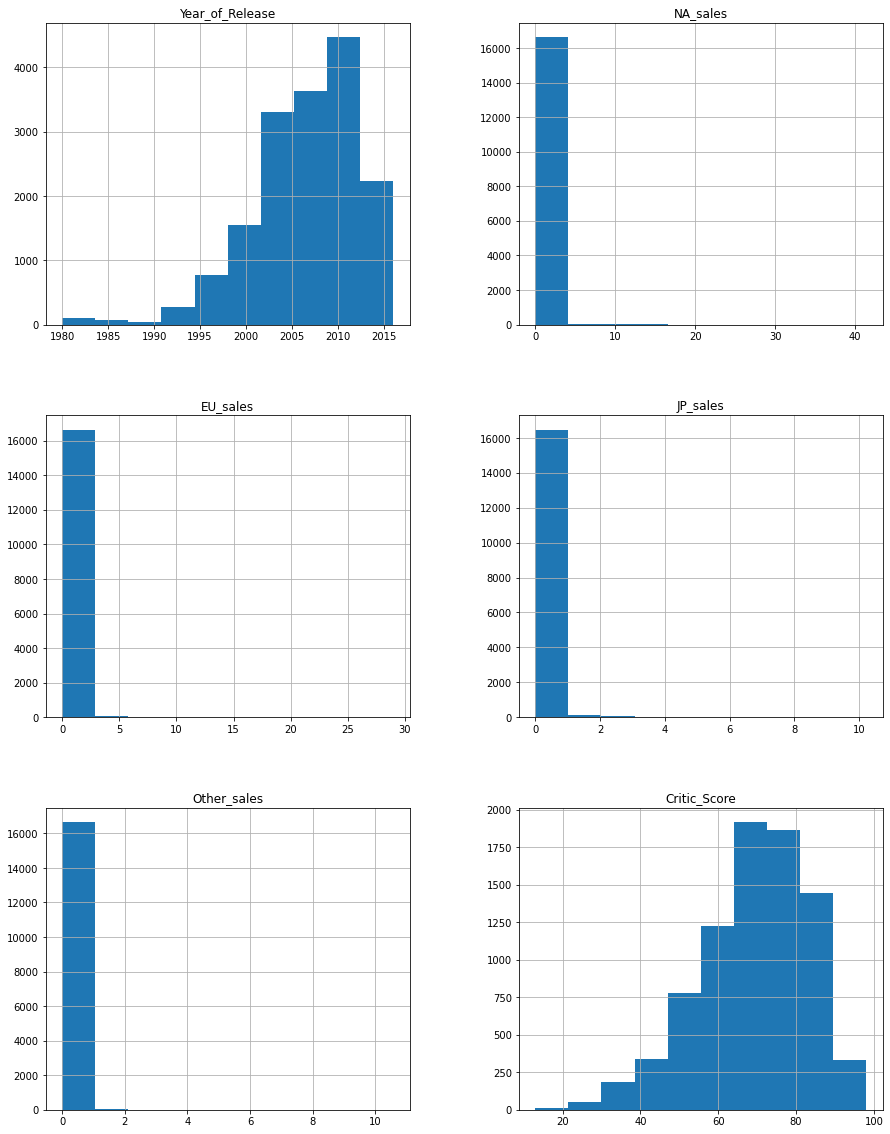

In [6]:
df.hist(figsize=(15, 20));

На первом этапе, мы:

загрузили данные из файла в датафрейм,

изучитли общую информацию о полученном датафрейме.

построили общую гистограмму для всех числовых столбцов таблицы.

Изучив общую информацию, мы видим, что количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Требуется преобразовать типы данных, заменить названия столбцов (привести к нижнему регистру), а так же мы видим, что в данных встречаються артефакты (аномалии) — значения, которые не отражают действительность. Нам необходимо устранить все проблемы в данных.


<div class="alert alert-success">

**Артём:** 👍 Хорошо.
    
</div>

#### Подготовка данных ####

##### Приведем к нижнему регистру #####

In [7]:
# перечень названий столбцов таблицы df
df.columns 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
# переименование столбцов
df = df.rename(
    columns={
        'Name' : 'name', 'Platform' : 'platform',  'Year_of_Release' : 'year_of_release',
        'Genre' : 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales',
        'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', 'User_Score' : 'user_score', 'Rating' : 'rating' })


In [9]:
# проверка результатов 
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### Работа с пропусками #####

In [10]:
# подсчёт пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

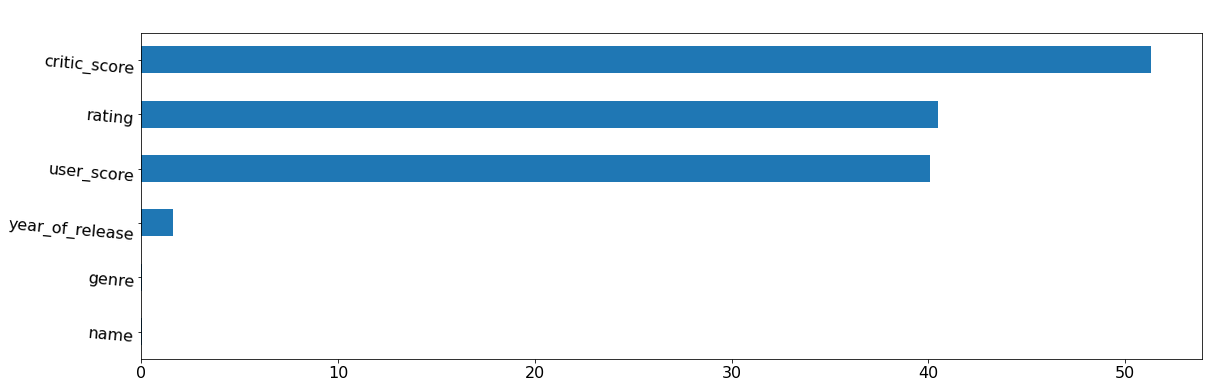

In [11]:
# пропущенные значения

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title("\n", fontsize = 11, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')
pass_value_barh(df)


In [12]:
# два пропуска в столбце name. Посмотрим на эти пропуски.
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
#удалим строки
df = df.dropna(subset=['name']).reset_index(drop=True)

In [14]:
#удалим строки
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

<div class="alert alert-success">

**Артём:** 👍 Согласен.
    
</div>

In [15]:
#выводим уникальные значния оценки критиков
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
#выводим уникальные значния рейтингов
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

"EC" - для детей 3+, "E" - для всех, "E10" - 10+, "T" - 13+, "M" - 17+, "AO" - 18+, "RP" - данный логотип используется в демо-версиях игр.К этому рейтингу часто идут пояснения для обоснования, "K-A" - игры содержащие контент для широкой аудитории.Этот рейтинг использовался до 1998г., он был переименован в "E"

Заменим рейтинг "K-A" на "E"

In [17]:
#заменим старое значение на новое
df = df.replace('K-A', 'E')

<div class="alert alert-success">

**Артём:** 👍 Хороший подход.
    
</div>

In [18]:
#заполним пропущенные значения в столбце rating словом unknown
df['rating'] = df['rating'].fillna('unknown')

In [19]:
#выводим уникальные значния оценки пользователей
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - аббревиатура от англ. To be Determined(будет определено или решено). Служит для отметки пропусков. Заменим на NaN

In [20]:
#заменим значение
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

<div class="alert alert-success">

**Артём:** 👍 Согласен.
    
</div>

##### Преобразование данных в нужные типы #####

In [21]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)

In [22]:
#получение общей информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


##### Посчитайте суммарные продажи во всех регионах #####

In [23]:
#посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


Было 16715 строк. После проведения предобработки осталось 16444 стрики(-271 строка). Потеря в данных составила 1,62%

Заменили названия столбцов - привели к нижнему регистру.

Преобразовали данные в нужные типы - год привели в целочисленный, оценка пользователей - на вещественные числа.

Пропуски в Critic_Score — оценка критиков, User_Score — оценка пользователей и в rating - рейинге удалять не будем. Скорее всего он не был присвоен, т.к. присвоение рейтинга не является обязательным условием для производителей, хотя ограничивает их распространение. 

Заменили значение рейтинга 'K-A' (это старое значение) - на новое 'E';

Аббревиатура tbd от англ. To be Determined(будет определено или решено). Служит для отметки пропусков. Заменили на NaN.

<div class="alert alert-success">

**Артём:** 👍 Все правильно.
    
</div>

#### Проведем исследовательский анализ данных ####

##### Посмотрим, сколько игр выпускалось в разные годы #####

In [25]:
#сколько игр выпускалось в разные годы
df.year_of_release.value_counts().to_frame()

,year_of_release
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775
2004,762


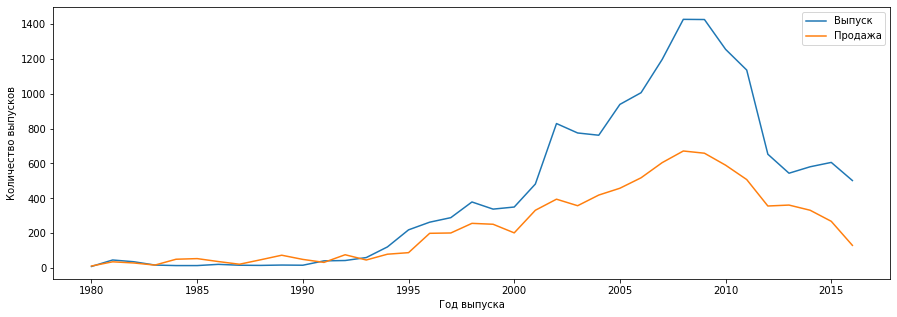

In [26]:
plt.figure(figsize=(15,5))
plt.plot(df.groupby('year_of_release')['name'].count(), label='Выпуск')
plt.plot(df.groupby('year_of_release')['total_sales'].sum(), label='Продажа')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпусков')
plt.show()

Рост количества выпусков и подажи игр начинается с 1994г. А начиная с 2000г. идет резкий подъем и достигает своего пика более 1400 в 2008 - 2009 гг. С 1980 по 1994 количество выпусков игр не превышало 121.

##### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построем распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? #####

In [27]:
#уникальные значения платформ
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [28]:
group_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10).index

group_platform = df.query('platform in (@group_platform)').pivot_table(index='year_of_release',
                                values='total_sales',
                                columns='platform',
                                aggfunc='sum').reset_index()

group_platform.columns = ['year_of_release','PS2','X360', 'PS3', 'Wii', 'DC', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

group_platform.head(10)


,year_of_release,PS2,X360,PS3,Wii,DC,PS,PS4,GBA,PSP,3DS
0,1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
2,1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
4,1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
5,1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
6,1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
8,2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN
9,2002,NaN,NaN,74.16,6.67,205.38,NaN,NaN,NaN,NaN,NaN


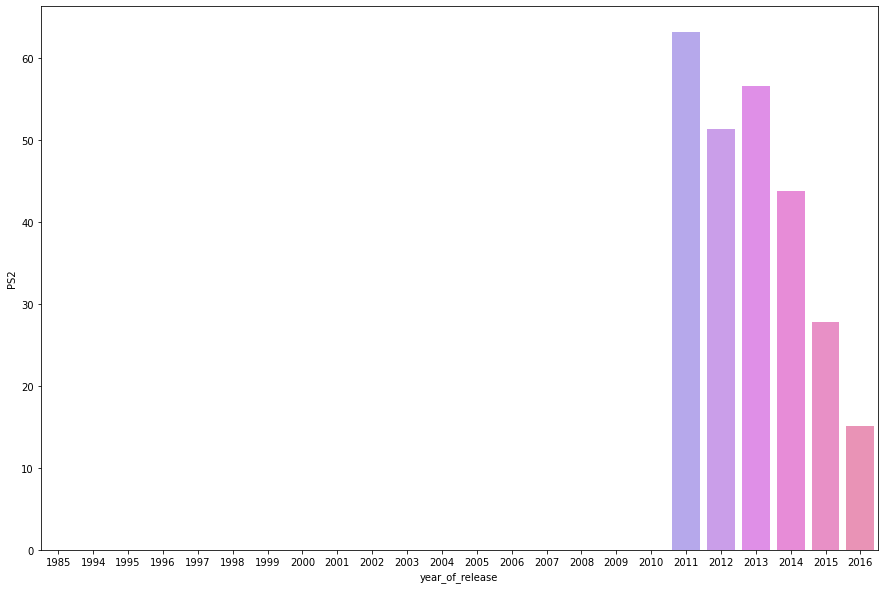

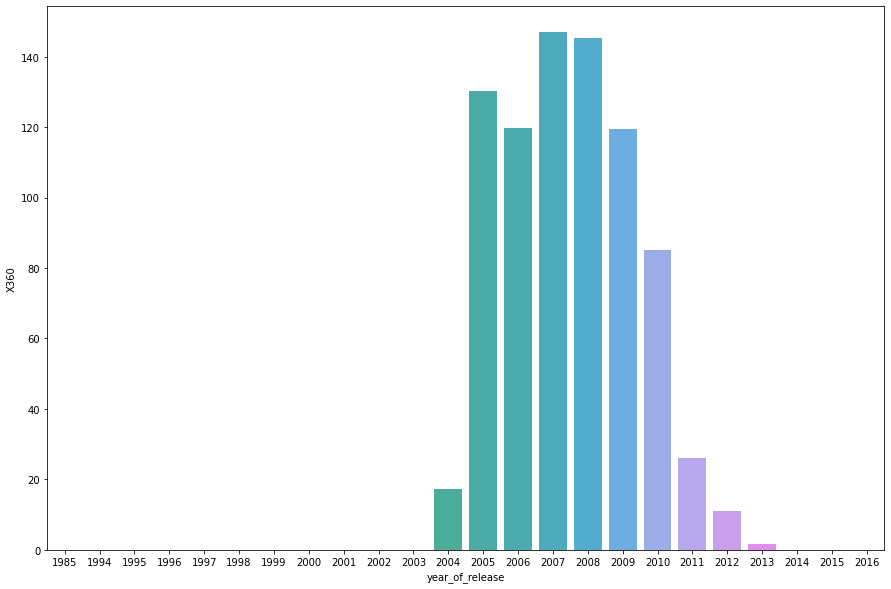

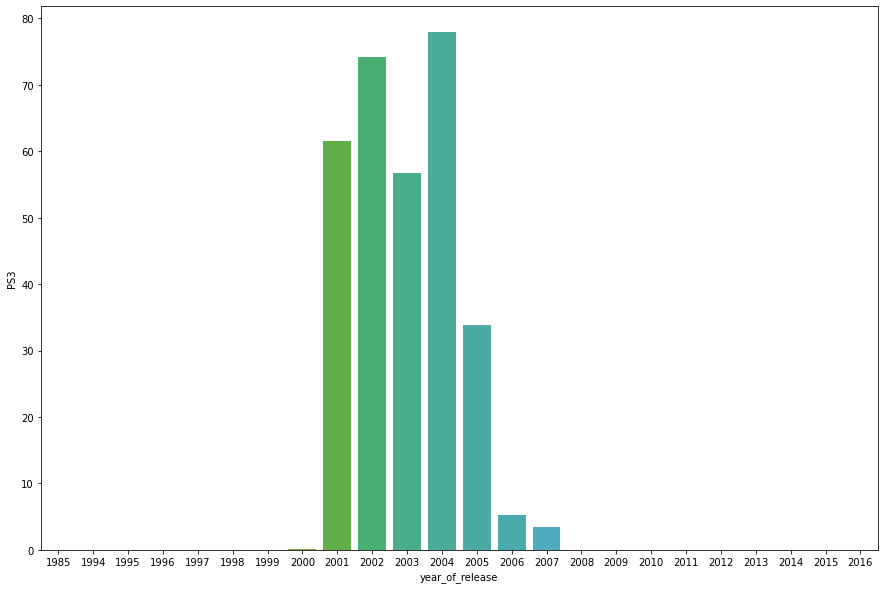

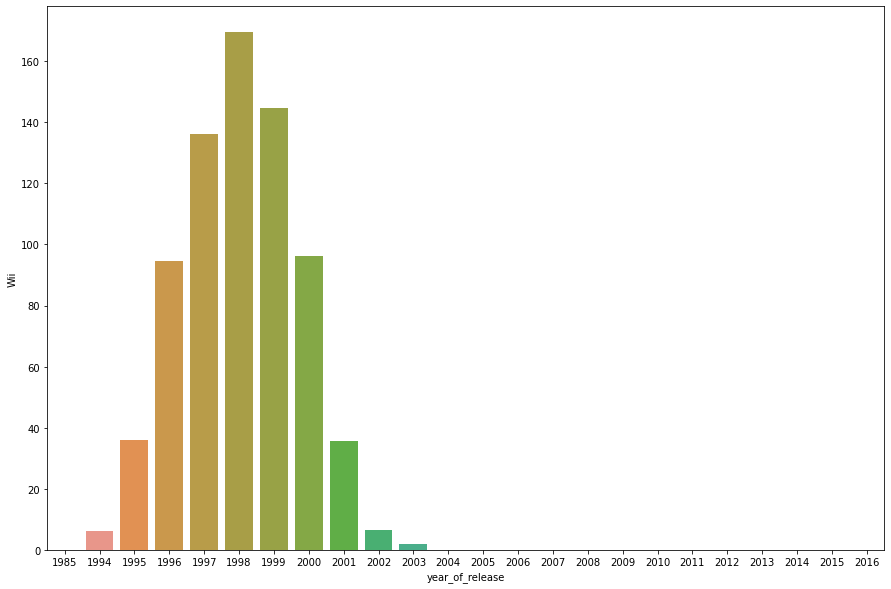

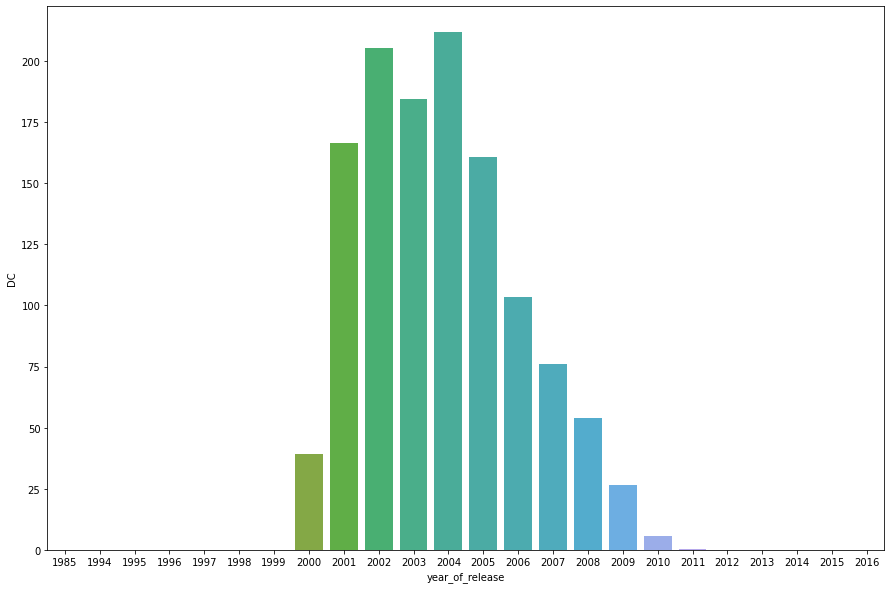

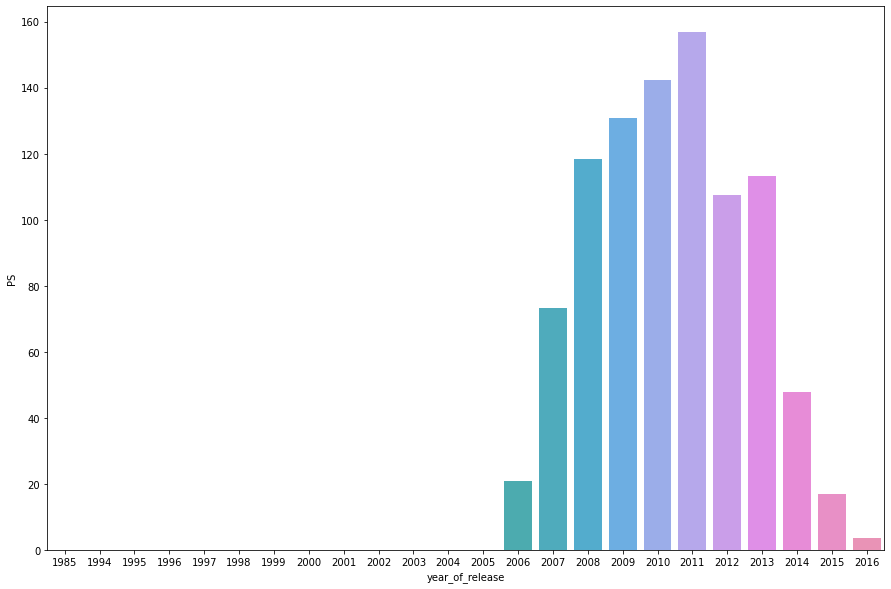

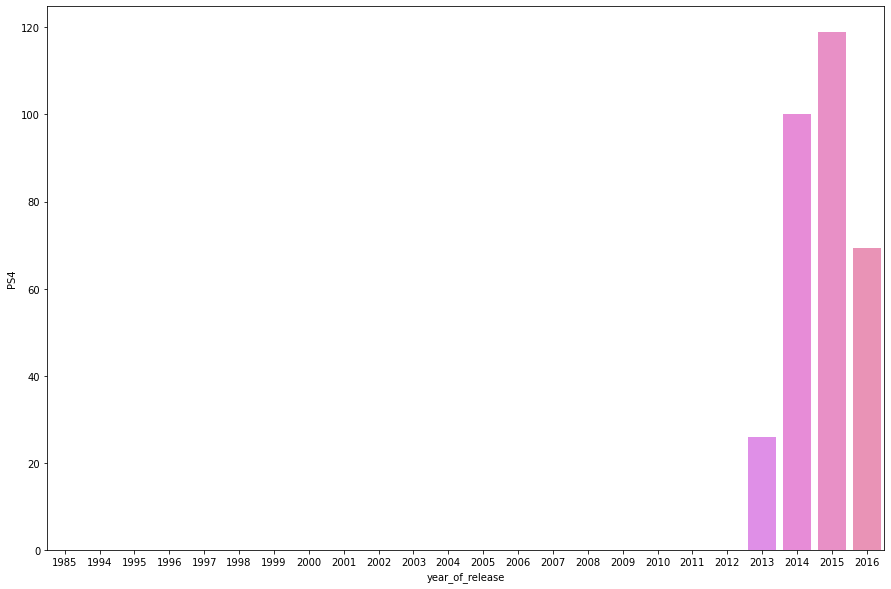

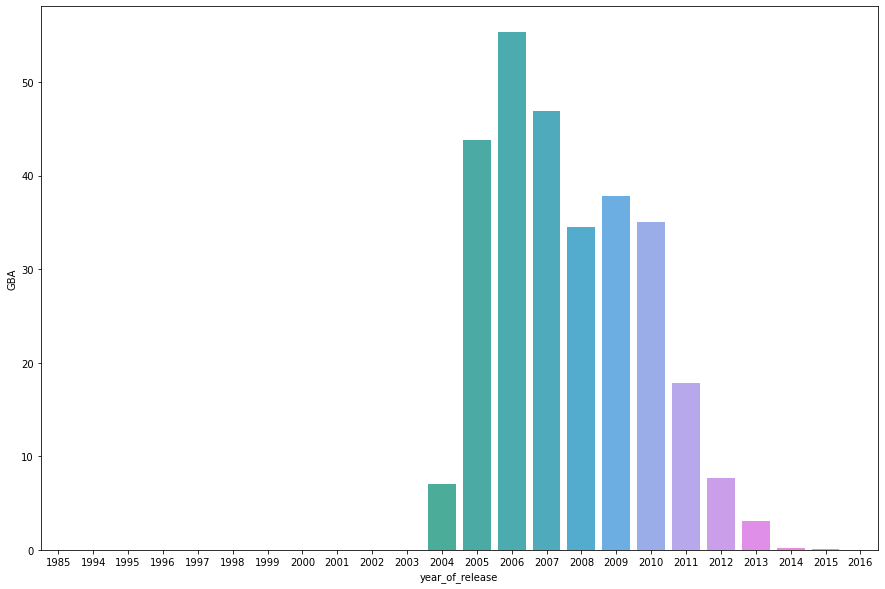

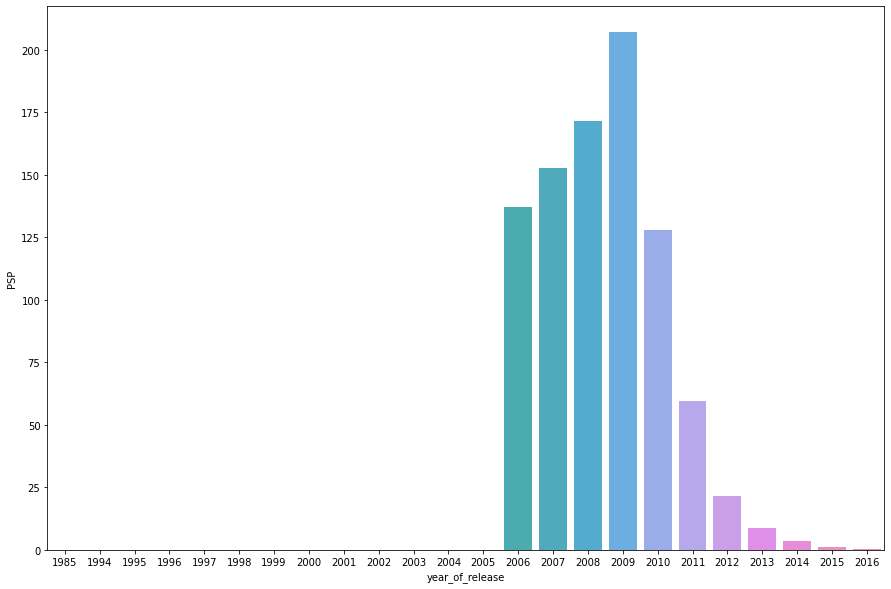

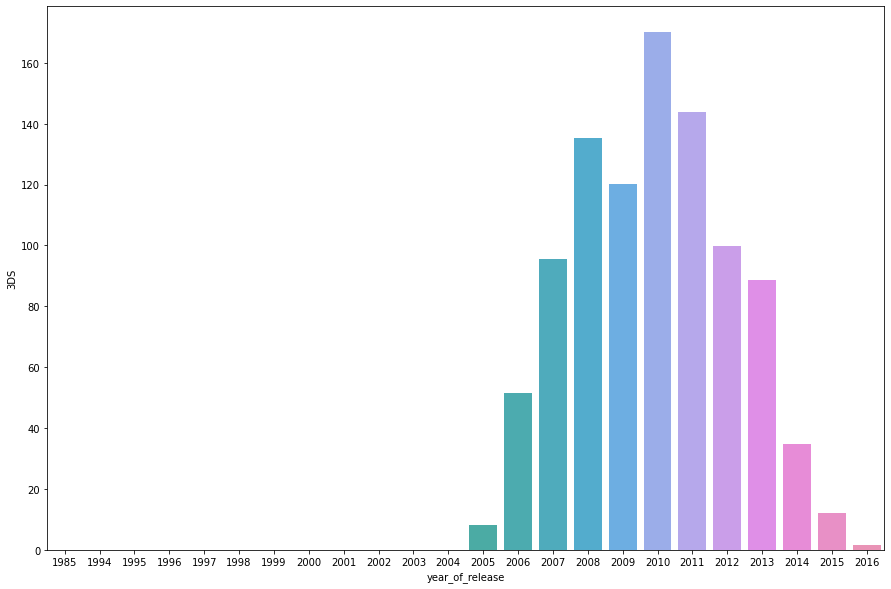

In [29]:
platforms = list(group_platform.columns)[1:]#список платформ
#пишем цикл, который проходит по топу приставок и для каждой делает график
for platform in platforms:
    plt.figure(figsize=(15, 10))
    plt.xlim(1985, 2016)
    sns.barplot(x='year_of_release', y=platform, data = group_platform)
    plt.show()

В среднем платформы существуют 10 - 11 лет. А пик развития приходится на 4-5 год существования платформы.
Таким образом нас НЕ интересуют платформы у которых не было продаж и выпусков в последний год. Нас НЕ интересуют платформы которым 10 и старше.
Соответственно, нас интересуют платформы, которые на 2017 год будут существовать уже 4-5 лет (как раз тот самый пик). Для этого посмотрим годы первого упоминания платформ.

<div class="alert alert-success">

**Артём:** 👍 Согласен.

</div>

##### Выберем несколько потенциально прибыльных платформ. #####

In [30]:
df.groupby('platform')['year_of_release'].min().sort_values(ascending=False)

platform
XOne    2013
PS4     2013
WiiU    2012
3DS     2011
PSV     2011
PS3     2006
Wii     2006
X360    2005
PSP     2004
GC      2001
GBA     2000
PS2     2000
XB      2000
WS      1999
DC      1998
PCFX    1996
N64     1996
TG16    1995
SAT     1994
PS      1994
3DO     1994
SCD     1993
NG      1993
GG      1992
SNES    1990
GEN     1990
GB      1988
PC      1985
DS      1985
NES     1983
2600    1980
Name: year_of_release, dtype: int64

In [31]:
#посмотрим 2016г
df.query('year_of_release == 2016')['platform'].describe()

count     502
unique      9
top       PS4
freq      164
Name: platform, dtype: object

In [32]:
df.query('year_of_release == 2016')['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [33]:
df.query('year_of_release == 2016 and total_sales != 0')['platform'].value_counts().to_frame()

,platform
PS4,164
XOne,87
PSV,85
PC,54
3DS,46
PS3,38
WiiU,14
X360,13
Wii,1


In [34]:
df.query('year_of_release == 2015')['platform'].value_counts().to_frame()

,platform
PS4,137
PSV,110
3DS,86
XOne,80
PS3,73
PC,50
X360,35
WiiU,28
Wii,4
PSP,3


Итак можно определиться с потенциально прибыльными платформами, которые мы оставим для анализа. 

Это XOne, PS4, WiiU, 3DS.
PC это аппаратная платформа компбютера(мы ее в расчет не берем)

Наиболее актуальный период возьмем с 2013г.

<div class="alert alert-success">

**Артём:** 👍 Верно.

</div>

##### Не учитывая в работе данные за предыдущие годы создадим новый df с данными которые будем исследовать и выявлять перспективные платформы. #####

In [35]:
#создали новый df с 2013
df_new = df.loc[df['year_of_release'] >= 2013].reset_index(drop=True)

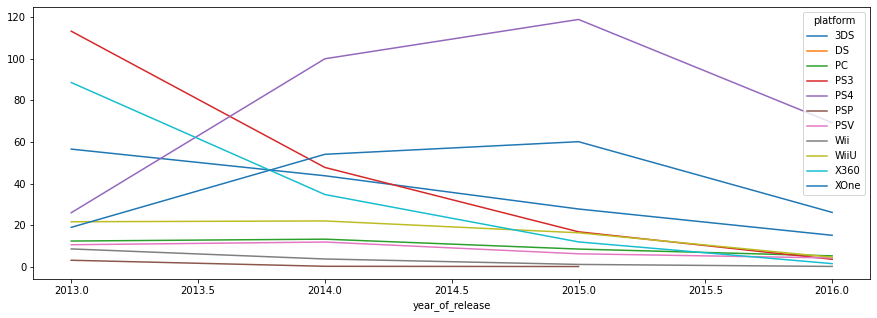

In [36]:
df_new.pivot_table(index='platform',
                  values='total_sales',
                  columns='year_of_release',
                  aggfunc='sum').T.plot(figsize=(15, 5));

На этом графике мы видим, что такие платформы как PS4, XOne их пик приходится на 2015г. Они находятся на подъеме.

3DS, WiiU они идут ровно, пика продаж не видно.

Такие платформы как PS3, X360 прошли свой пик и PSP, Wii их существование подходит к логическому завершению.


<div class="alert alert-success">

**Артём:** 👍👍 Верно, молодец. 

</div>

##### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. #####

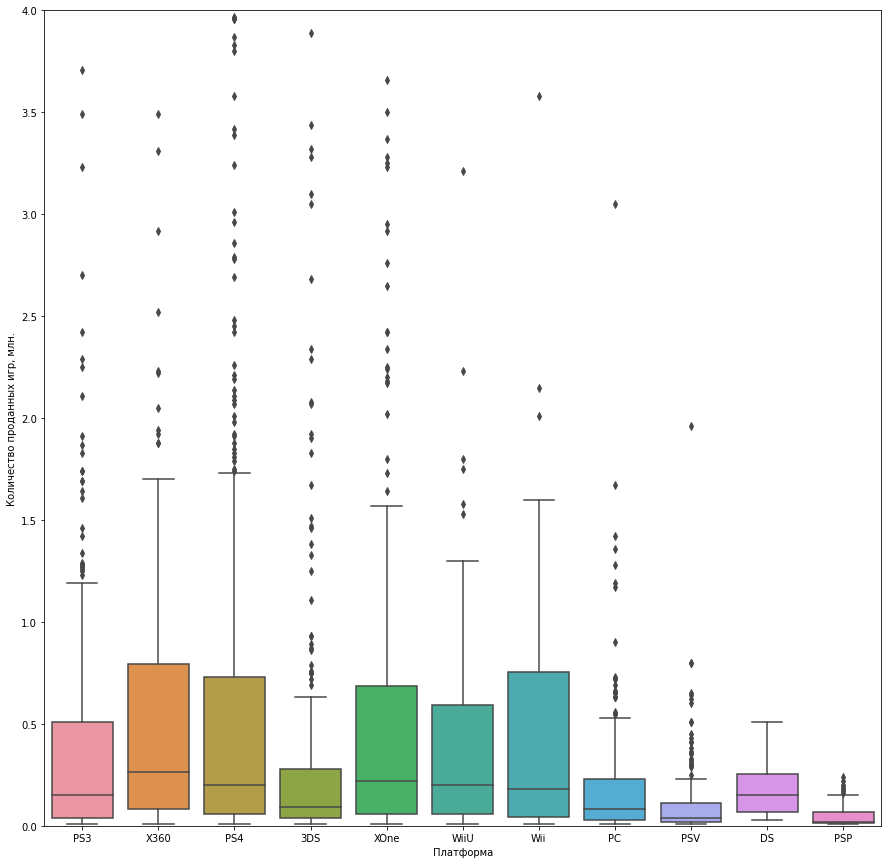

In [37]:
plt.figure(figsize=(15, 15))
plt.ylim(0, 1)

ax = sns.boxplot(x='platform', y='total_sales', data=df_new)

plt.xlabel('Платформа')
plt.ylabel('Количество проданных игр, млн.')
plt.ylim(0, 4)
plt.show()

Итак: лидерами продаж являются PS4. Первый квартиль Q1 окола 100 тыс., третий квартиль Q3 700 - 750, самы длинный ус чуть более 1700, но так же самое большое количество выбросов с выпущенными играми.А так же платформа XOne, чуть меньше ус 1600 и выбросов. Медиана у всех платформ практически одинаковая.Самый маленький ящик (из интересующих нас платформ) - 3DS, но так же много выбросов(выбросы тоже приносят прибыль).

Такие платформы как PSP, DS  они отжили свой век.

PS3, Wii - эти платформы на закате своих дней, хотя и выстреливают(нам они не интересны).



<div class="alert alert-success">

**Артём:** 👍 Правильно.
    
</div>

##### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами #####

In [38]:
# отберем игры только для PS4 и запишем в переменную
score_corr = df_new.query('platform == "PS4"')
print(f'корреляцию между отзывами и продажами критиков: {df_new.critic_score.corr(df_new.total_sales):.2}')
print(f'корреляцию между отзывами и продажами пользователей: {df_new.user_score .corr(df_new.total_sales):.2}')

корреляцию между отзывами и продажами критиков: 0.31
корреляцию между отзывами и продажами пользователей: -0.0026


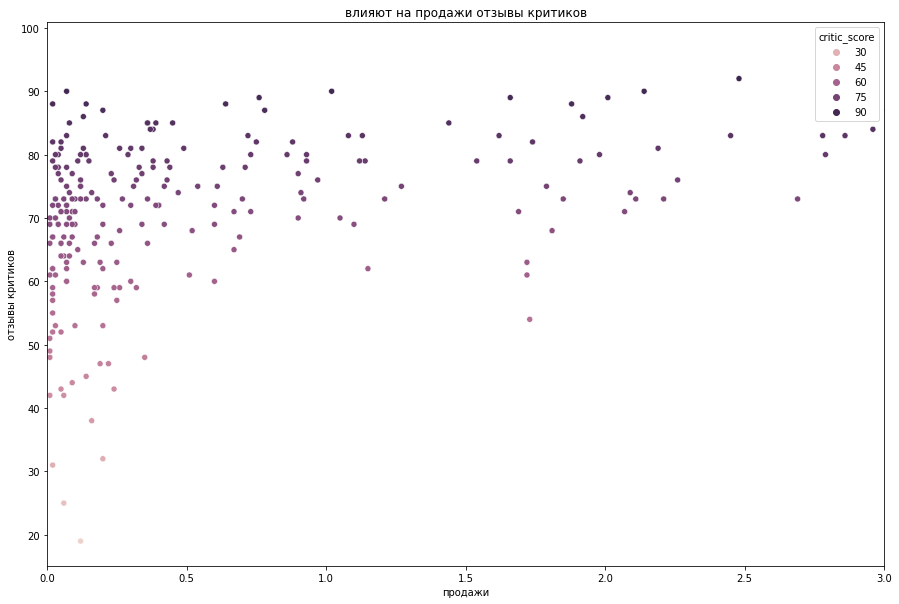

In [39]:
#построим график рассеивания
plt.figure(figsize=(15, 10))
plt.xlim(0, 3)
sns.scatterplot(data=score_corr, x="total_sales", y="critic_score", hue="critic_score");
plt.xlabel('продажи')
plt.ylabel('отзывы критиков')
plt.title('влияют на продажи отзывы критиков')
plt.show()

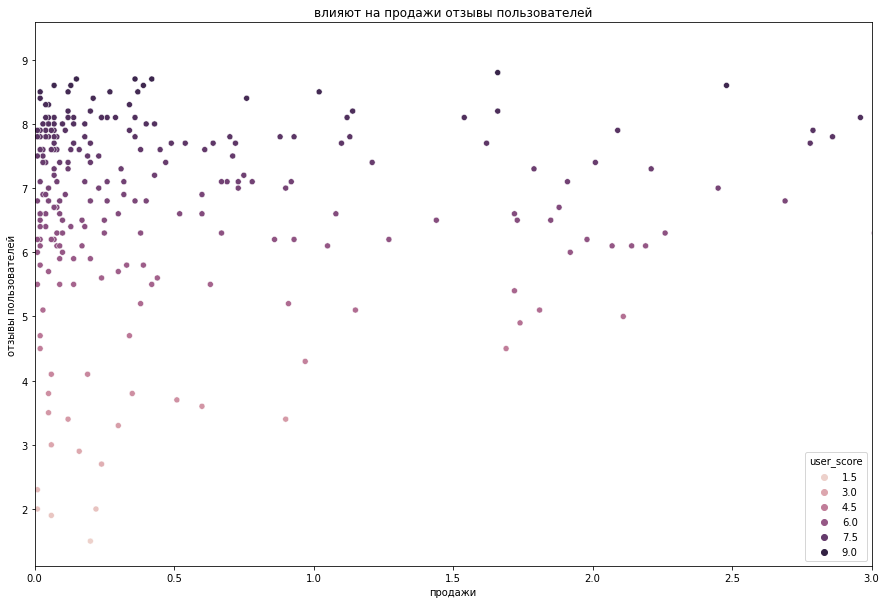

In [40]:
#построим график рассеивания
plt.figure(figsize=(15, 10))
plt.xlim(0, 3)
sns.scatterplot(data=score_corr, x="total_sales", y="user_score", hue="user_score");
plt.xlabel('продажи')
plt.ylabel('отзывы пользователей')
plt.title('влияют на продажи отзывы пользователей')
plt.show()

##### Соотнесите выводы с продажами игр на других платформах. #####

In [41]:
for n in ["XOne", "3DS", "WiiU"]:
    print(n)
    df_new_corr = df.query('platform == @n')
    print(f'корреляцию между отзывами и продажами критиков: {df_new_corr.critic_score.corr(df_new_corr.total_sales):.2}')
    print(f'корреляцию между отзывами и продажами пользователей: {df_new_corr.user_score .corr(df_new_corr.total_sales):.2}')
    print('---'*20)

XOne
корреляцию между отзывами и продажами критиков: 0.42
корреляцию между отзывами и продажами пользователей: -0.069
------------------------------------------------------------
3DS
корреляцию между отзывами и продажами критиков: 0.35
корреляцию между отзывами и продажами пользователей: 0.22
------------------------------------------------------------
WiiU
корреляцию между отзывами и продажами критиков: 0.35
корреляцию между отзывами и продажами пользователей: 0.4
------------------------------------------------------------


Мы видим, что отзывы критиков имеют влияние на продажи. Чем выше оценка критиков, тем выше продажи. Корреляция положительная. Чего не скажешь об отзывах пользоватлей. Корреляция между отзывами и продажами пользователей слабая и отрицательная.

<div class="alert alert-success">

**Артём:** 👍 Вывод верный.
    
</div>

##### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? #####

In [42]:
#уникальные значения жаноров
df_new['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

In [43]:
#список характерных значений
df_new['genre'].describe()

count       2233
unique        12
top       Action
freq         766
Name: genre, dtype: object

In [44]:
# создаем сводную таблицу по жанрам
popular_genre = df_new.pivot_table(index=['genre'],
values=['total_sales'],
aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()

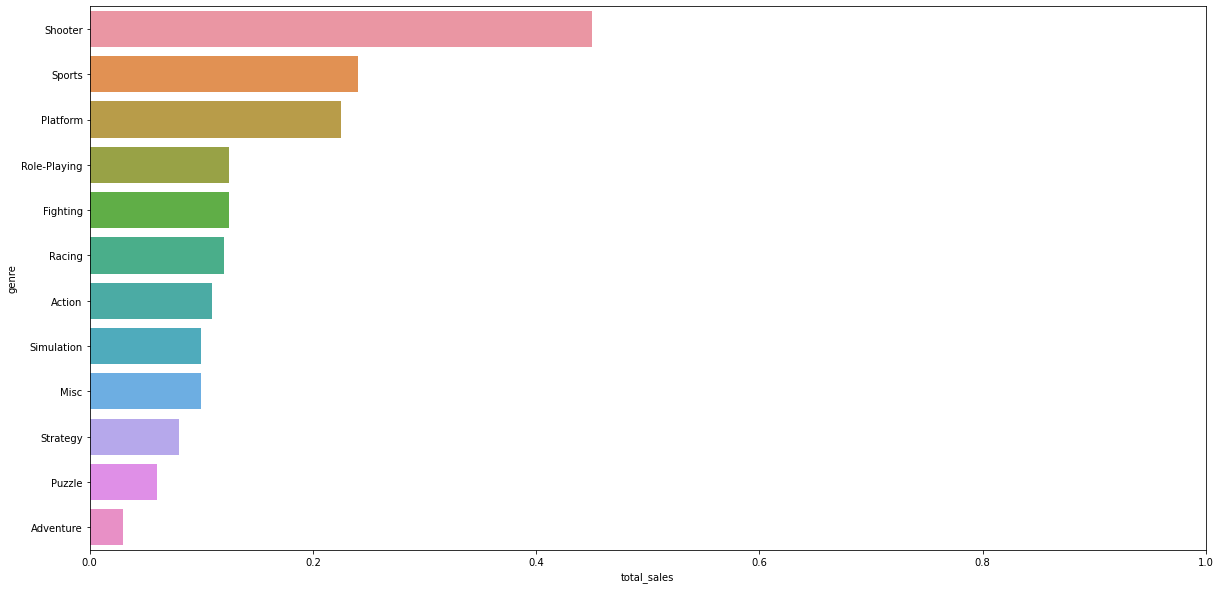

In [45]:
plt.figure(figsize=(20, 10))
plt.xlim(0, 1)
sns.barplot(x="total_sales", y='genre', data=popular_genre)
plt.show()

In [46]:
popular_genre = df_new.groupby('genre')['total_sales'].median()
popular_genre

genre
Action          0.110
Adventure       0.030
Fighting        0.125
Misc            0.100
Platform        0.225
Puzzle          0.060
Racing          0.120
Role-Playing    0.125
Shooter         0.450
Simulation      0.100
Sports          0.240
Strategy        0.080
Name: total_sales, dtype: float64

In [47]:
df_new = df.query('year_of_release >= 2013').reset_index(drop=True)

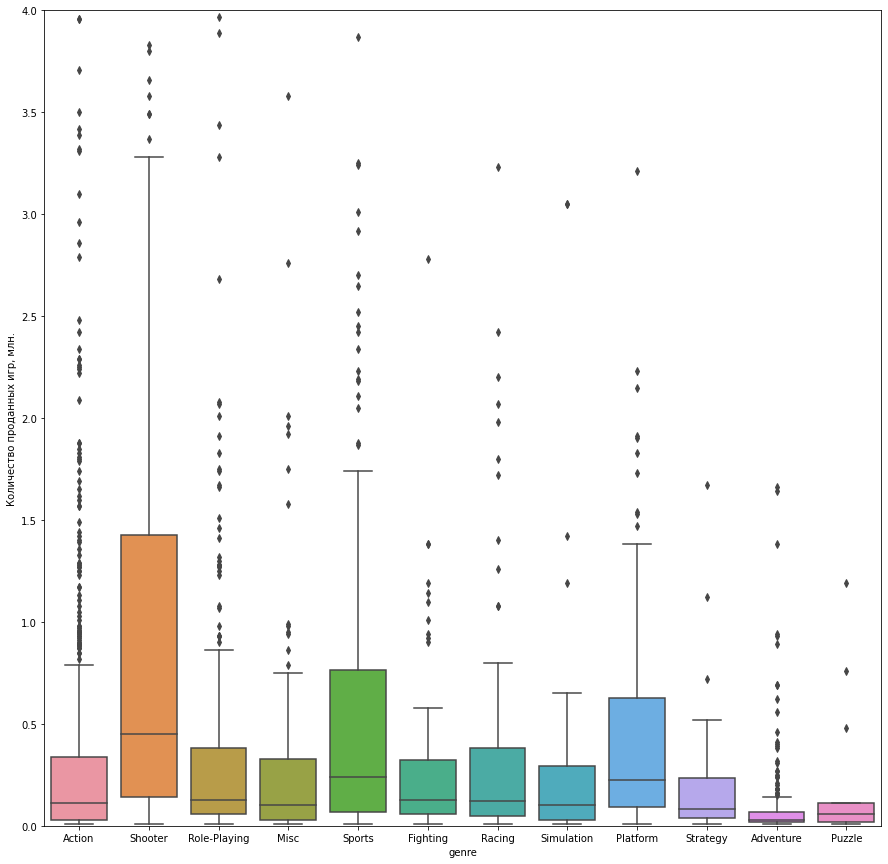

In [48]:
plt.figure(figsize=(15, 15))
plt.ylim(0, 1)

ax = sns.boxplot(x='genre', y='total_sales', data=df_new)

plt.xlabel('genre')
plt.ylabel('Количество проданных игр, млн.')
plt.ylim(0, 4)
plt.show;

Лидер - Shooter. Это видно и по ящику с усами и медиане.
На втором месте жанры - Sports и Platform.

<div class="alert alert-success">

**Артём:** 👍 Тоже правильно.
    
</div>

 #### Составим портрет пользователя каждого региона ####

##### Самые популярные платформы (топ-5). Опишите различия в долях продаж. #####

In [49]:
#NA_sales — популярные платформы в Северной Америке

na_pl_pop = df_new.pivot_table(index='platform', values='na_sales',aggfunc='sum')\
                  .sort_values(by='na_sales', ascending=False).head()
na_pl_pop

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [50]:
#EU_sales — популярные платформы в Европе
eu_pl_pop = df_new.pivot_table(index='platform', values='eu_sales',aggfunc='sum')\
                  .sort_values(by='eu_sales', ascending=False).head()
eu_pl_pop

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [51]:
#JP_sales — популярные платформы в Японии
jp_pl_pop = df_new.pivot_table(index='platform', values='jp_sales',aggfunc='sum')\
                  .sort_values(by='jp_sales', ascending=False).head()
jp_pl_pop  

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


**Доли продаж по платформам в Северной Америке**

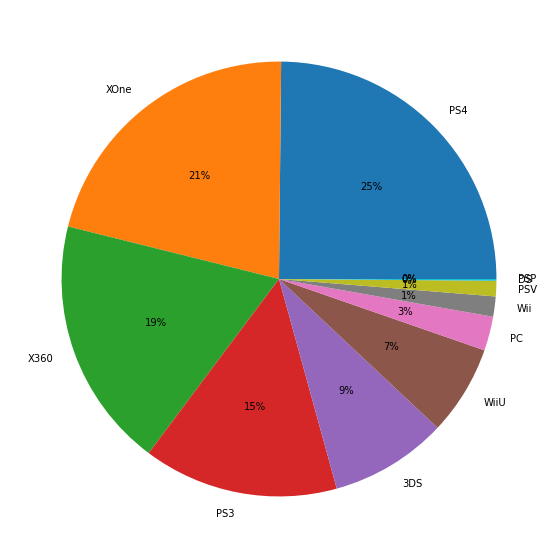

In [52]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

pop_pivot_na = df_new.pivot_table(index='platform',
                  values='na_sales',
                  aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()

plt.rcParams["figure.figsize"] = (20,10)
plt.pie(pop_pivot_na['na_sales'], labels = pop_pivot_na['platform'], autopct='%.0f%%')
plt.show()

**Доли продаж по платформам в Европе**

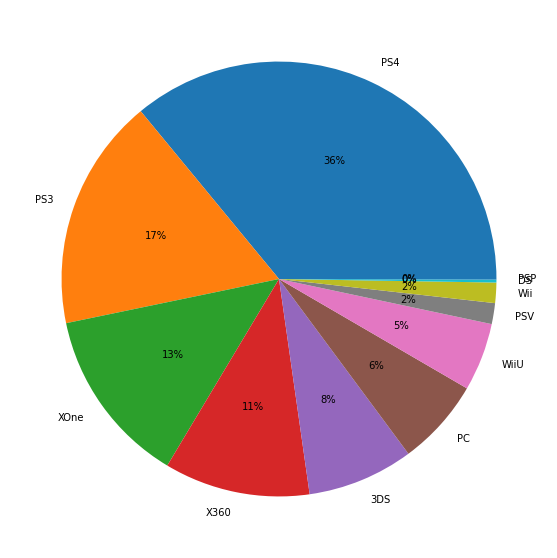

In [53]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

pop_pivot_eu = df_new.pivot_table(index='platform',
                  values='eu_sales',
                  aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()

plt.rcParams["figure.figsize"] = (20,10)
plt.pie(pop_pivot_eu['eu_sales'], labels = pop_pivot_eu['platform'], autopct='%.0f%%')
plt.show()

**Доли продаж по платформам в Японии**

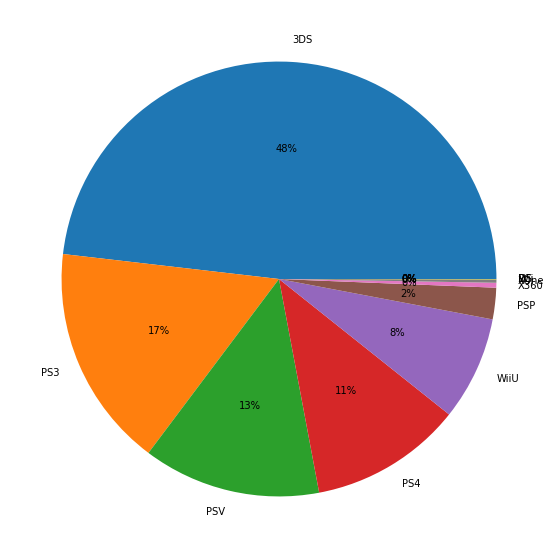

In [54]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

pop_pivot_jp = df_new.pivot_table(index='platform',
                  values='jp_sales',
                  aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()

plt.rcParams["figure.figsize"] = (20,10)
plt.pie(pop_pivot_jp['jp_sales'], labels = pop_pivot_jp['platform'], autopct='%.0f%%')
plt.show()

Мы видим, что в Северной Америке и в Европе выбор топ-5 платформ практически схож, с енбольшим различием в долях.
С.А. - PS4 - 25%, XOne - 21%, X360 - 19%, PS3 - 15%, 3DS - 9%
EU -   PS4 - 36%, PS3 - 17%, XOne - 13%, X360 - 11%, 3DS - 8%
Что в Северной Америке, что в Европе лидирует платформа - PS4

В Японии же все с точностью до наоборот:
Лидирует платформа 3DS - 48% занимает практически половину.
Остальное разделили между собой платформы PS3 - 17%, PSV - 13%, PS4 -11%, WiiU - 8%


<div class="alert alert-success">

**Артём:** 👍 Все правильно, Япония самобытна.

</div>

##### Самые популярные жанры (топ-5). Поясните разницу. #####

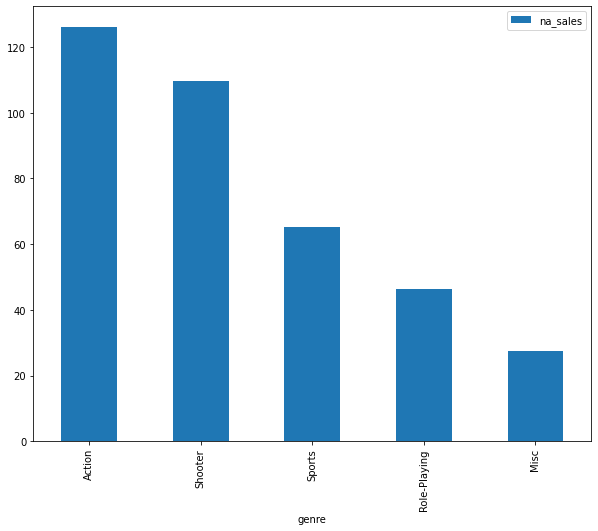

In [55]:
#NA_sales — популярные жанры в Северной Америке

na_genre_pop = df_new.pivot_table(index='genre', values='na_sales',aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).head()
na_genre_pop.plot(kind='bar', figsize=(10, 8));

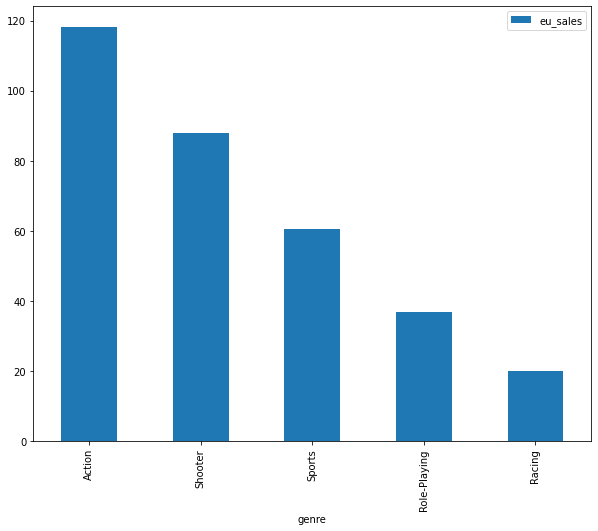

In [56]:
#EU_sales — популярные жанры в Европе

eu_genre_pop = df_new.pivot_table(index='genre', values='eu_sales',aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).head()
eu_genre_pop.plot(kind='bar', figsize=(10, 8));

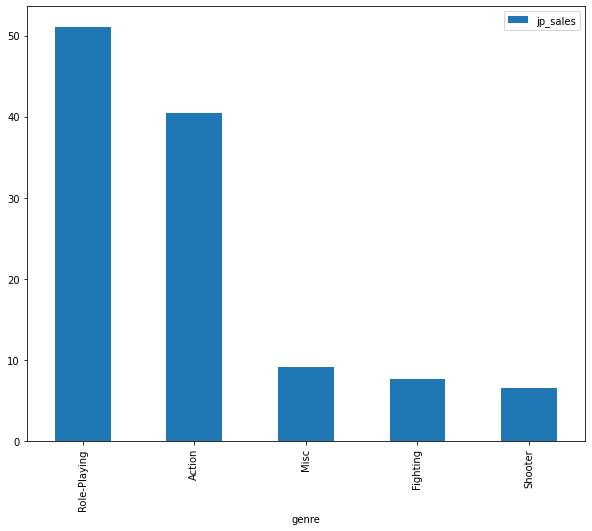

In [57]:
#JP_sales — популярные жанры в Японии

jp_genre_pop = df_new.pivot_table(index='genre', values='jp_sales',aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).head()
jp_genre_pop.plot(kind='bar', figsize=(10, 8)); 


<div class="alert alert-success">

**Артём:** 👍👍 Хорошо. 

</div>

Тоже самое мы видим и по жанрам:
В С.Америка и Европе даже графики схожи. Лидируют такие жанры как - Action, Shooter, Sports, Role-Playing

Жанры в Японии полная противоположность.
На первое место выходит жанр Role-Playing, Action на втором месте, Shooter занимает последнее, а вот такой жанр как Sports вообще не вошел в топ-5.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе? #####

In [58]:
# рейтинг ESRB для Северной Америке
na_esrb = df.groupby('rating')['na_sales'].sum()
na_esrb

rating
AO            1.26
E          1276.80
E10+        345.50
EC            1.53
M           742.89
RP            0.00
T           747.60
unknown    1225.84
Name: na_sales, dtype: float64

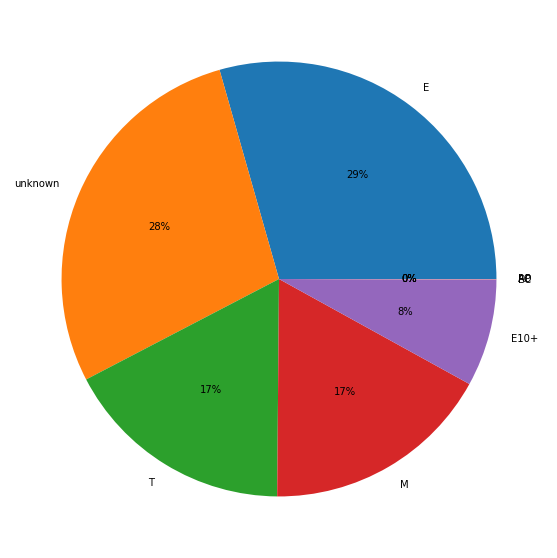

In [59]:
# рейтинг ESRB для Северной Америке
na_esrb = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()

plt.rcParams["figure.figsize"] = (20,10)

plt.pie(na_esrb['na_sales'], labels = na_esrb['rating'], autopct='%.0f%%')
plt.show()

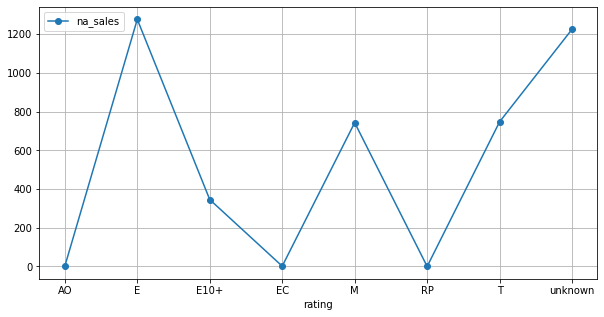

In [60]:
# рейтинг ESRB для Северной Америке
na_esrb = df.pivot_table(index='rating', values='na_sales',aggfunc='sum')\
.plot(grid=True, style= 'o-', figsize=(10, 5))

Здесь мы видим что рейтинг "E"(это "для всех") и компьютерные игры которые не прошли оценку ESRB и им не была присвоена подходящая возрастная категория - лидируют и практически вровень идут.

In [61]:
# рейтинг ESRB для Европы
eu_esrb = df.groupby('rating')['eu_sales'].sum()
eu_esrb

rating
AO           0.61
E          704.14
E10+       183.35
EC           0.11
M          480.00
RP           0.03
T          421.79
unknown    609.65
Name: eu_sales, dtype: float64

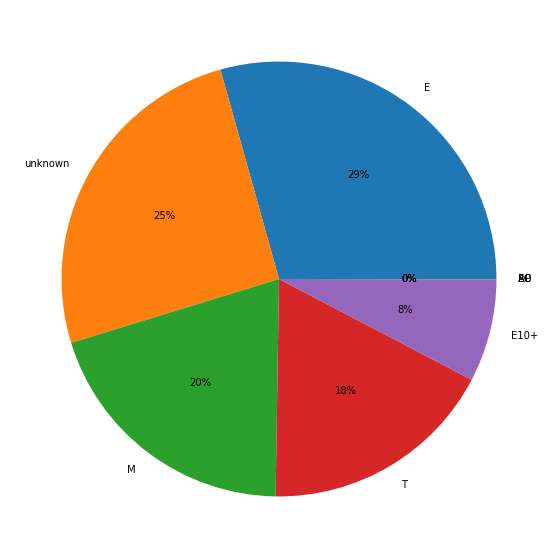

In [62]:
# рейтинг ESRB для Европы
eu_esrb = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()

plt.rcParams["figure.figsize"] = (20,10)

plt.pie(eu_esrb['eu_sales'], labels = eu_esrb['rating'], autopct='%.0f%%')
plt.show()

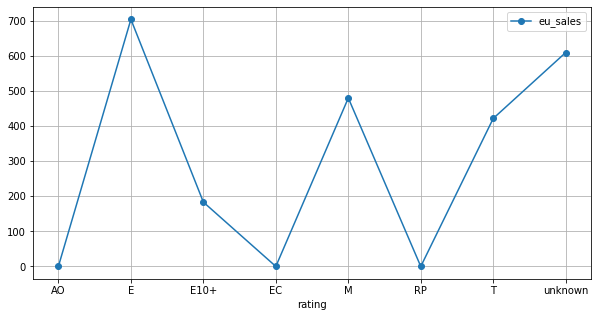

In [63]:
# рейтинг ESRB для Европы
eu_esrb = df.pivot_table(index='rating', values='eu_sales',aggfunc='sum')\
.plot(grid=True, style= 'o-', figsize=(10, 5))

"Картина маслом". Тоже самое можно сказать и о возрастном рейтинге компьютерных игр в Европе.

In [64]:
# рейтинг ESRB для Японии
jp_esrb = df.groupby('rating')['jp_sales'].sum()
jp_esrb

rating
AO           0.00
E          199.42
E10+        40.20
EC           0.00
M           63.58
RP           0.00
T          150.70
unknown    836.74
Name: jp_sales, dtype: float64

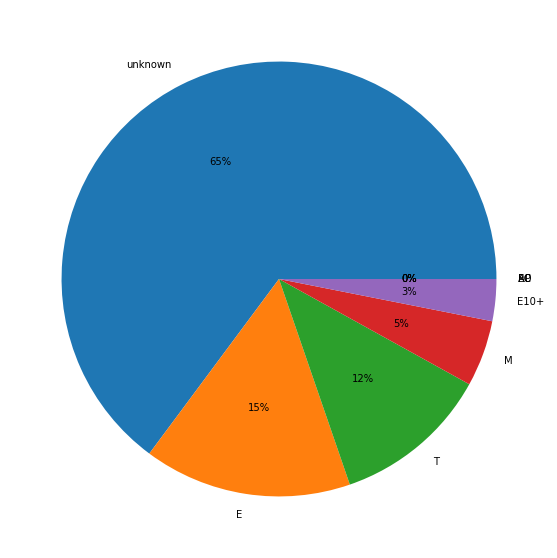

In [65]:
# рейтинг ESRB для Японии
jp_esrb = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()

plt.rcParams["figure.figsize"] = (20,10)

plt.pie(jp_esrb['jp_sales'], labels = jp_esrb['rating'], autopct='%.0f%%')
plt.show()

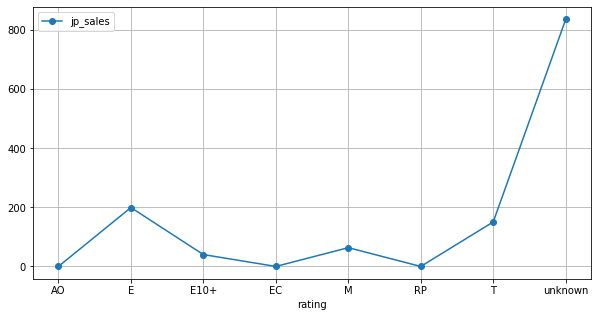

In [66]:
# рейтинг ESRB для Японии
jp_esrb = df.pivot_table(index='rating', values='jp_sales',aggfunc='sum')\
.plot(grid=True, style= 'o-', figsize=(10, 5))

А вот в Японии 65% компьютерных игр которые не прошли оценку ESRB.

Итак, что можно сказать:
Рейтинг в С.Америке и Европе совпадает.
Самый популярный это "E"(для всех) - 29%, следом идут игры которые не прошли оценку ESRB - 25 - 28%, 
Рейтинг "Т" и "M" в СА - 17%, в Европес небольшой разницей 18 и 20%, ну и "E10+" - 8%

В Яонии же самый популярный рейтинг это отсутствие рейтинга вообще. Занимает 65% от всех игровых контентов.
Рейтинг "E"(для всех) - 15%, "T" (13+) - 12%, "M"(17+) - 5%

Для справки:

ESRB - негосударственная организация,основанная в 1994г. в США и Канаде.

В Японии существует своя рейтинговая организация CERO - Японская НЕкоммерческая организация, которая была основана с 2002 года.
Где продажа игр категории 18+ контролируется государством.

Возможно, что именно по этой причине в Японии преобладают компьютерных игр которые не прошли оценку.

<div class="alert alert-success">

**Артём:** 👍👍 Отлично, верный вывод. 

</div>

#### Проверьте гипотезы ####

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Обозначим H0 (нулевую) и H1 (альтернативную) гипотезы:

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные

<div class="alert alert-success">

**Артём:** 👍 Гипотезы сформулированы верно.

</div>

In [67]:
#задаем критический уровень статистической значимости
alpha = .05 

results = st.ttest_ind(
    df_new[(df_new.platform == "XOne") & (df_new.user_score.notna())]['user_score'],
    df_new[(df_new.platform == "PC") & (df_new.user_score.notna())]['user_score']
)# проверьте гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) #выведите на экран получившеся p-значение

if results.pvalue < alpha: # сравните получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


У нас нет оснований утверждать, что средние пользовательские рейтинги на этих платформах не отличаются.

<div class="alert alert-success">

**Артём:** 👍👍 Правильно. 

</div>

H0 - Средние пользовательские рейтинги жанров Action и Sports разные.

H1 - Средние пользовательские рейтинги жанров Action и Sports не отличаются.

In [68]:
action = df_new.query('(user_score == user_score) and (genre == "Action")')['user_score']
sports = df_new.query('(user_score == user_score) and (genre == "Sports")')['user_score']

alpha = .05 #задайте критический уровень статистической значимости

results = st.ttest_ind(
    action,
    sports
)  
print('p-значение:', results.pvalue) #выведите на экран получившеся p-значение

if results.pvalue < alpha: # ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


p - значение хоть и очень мало, нулевую гипотезу отвергаем. 

<div class="alert alert-success">

**Артём:** 👍 Гипотезы сформулированы верно.

</div>

#### Общий вывод ####

Изучая выборку данных о продажах игр с 1980 - 2016гг., мы определили срок жизни платформ, их пики, наиболее востребованные жанры, а также составили портреты пользователей по разым регионам. И теперь, на основе этих данных можно спланировать компанию на 2017г.

Итак:
платформы PS4, XOne, WiiU, 3DS находятся на пике популярности. В среднем платформы существуют 10 - 11 лет. А пик развития приходится на 4-5 год существования платформы. Актуальный период был взят с 2013г. - следовательно пик этих платформ приходится на 2016 - 2017 гг.

 Наиболее востребованные жанры это: 
если смотреть на общее распределение игр по жанрам , то это Shooter, Sports, Platform, Role-Playing
 
 При этом есть региональные различия:
 
 Мы видим, что в Северной Америке и в Европе выбор топ-5 платформ практически схож, с небольшим различием в долях. С.А. - PS4 - 25%, XOne - 21%, X360 - 19%, PS3 - 15%, 3DS - 9% EU - PS4 - 36%, PS3 - 17%, XOne - 13%, X360 - 11%, 3DS - 8% Что в Северной Америке, что в Европе лидирует платформа - PS4

В Японии же все с точностью до наоборот: Лидирует платформа 3DS - 48% занимает практически половину. Остальное разделили между собой платформы PS3 - 17%, PSV - 13%, PS4 -11%, WiiU - 8%

И не забываем про оценку:

Мы видим, что отзывы критиков имеют влияние на продажи. Чем выше оценка критиков, тем выше продажи. Корреляция положительная. Чего не скажешь об отзывах пользоватлей. Корреляция между отзывами и продажами пользователей слабая и отрицательная.

И рейтинг(присвоение рейтинга не является обязательным условием для производителей, хотя ограничивает их распространение):
ESRB Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Рейтинг в С.Америке и Европе совпадает.
Самый популярный это "E"(для всех) - 29%, следом идут игры которые не прошли оценку ESRB - 25 - 28%, 
Рейтинг "Т" и "M" в СА - 17%, в Европес небольшой разницей 18 и 20%, ну и "E10+" - 8%

В Яонии же самый популярный рейтинг это отсутствие рейтинга вообще. Занимает 65% от всех игровых контентов.
Рейтинг "E"(для всех) - 15%, "T" (13+) - 12%, "M"(17+) - 5%

Для справки:

ESRB - негосударственная организация,основанная в 1994г. в США и Канаде.

В Японии существует своя рейтинговая организация CERO - Японская НЕкоммерческая организация, которая была основана с 2002 года.
Где продажа игр категории 18+ контролируется государством.

Возможно, что именно по этой причине в Японии преобладают компьютерных игр которые не прошли оценку.
    
 

<div class="alert alert-success">

**Артём:** 👍 Хороший вывод.

</div>

<div class="alert alert-success">

**Артём:** ✌️ Стелла, спасибо за работу и внесенные корректировки! Критических замечаний нет.

Поздравляю, **проект принят!** 🥳 🎉 Ты умница!


Желаю тебе успехов в дальнейшем обучении. 😉

</div>